# Basic stats

How many ratings? 100,004
How many users? 671
How many movies? 9,125
How many unique ratings? 10
Unique rating values: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
Overall ratings mean: 3.54


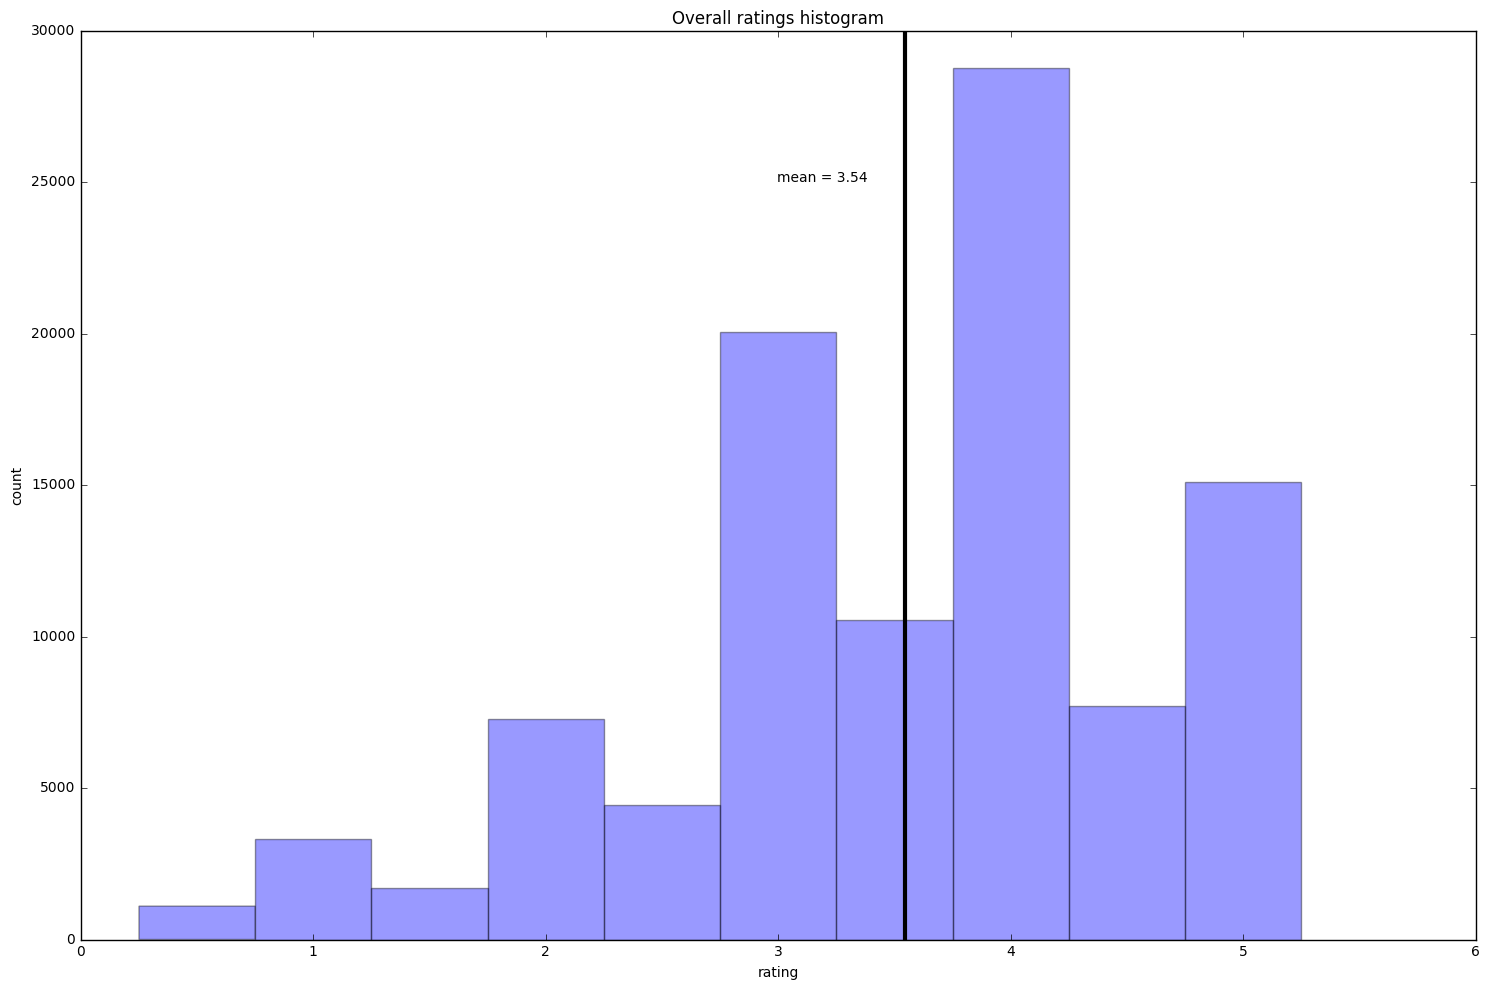

In [1]:
from collections import namedtuple, Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dataset = namedtuple('Dataset', ['ratings_df', 'movies_df'])


def read_data():
    ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
    movies_df = pd.read_csv('ml-latest-small/movies.csv')
    return Dataset(ratings_df, movies_df)


def show_ratings_histogram(ratings):
    _, ax = plt.subplots(1, 1, figsize=(15, 10))

    ax.hist(ratings, bins=np.arange(0.25, 5.5, step=0.5), alpha=0.4)

    ratings_mean = ratings.mean()

    ax.axvline(x=ratings_mean, linewidth=3, color='k')
    plt.text(ratings_mean - 0.55, 25000, 'mean = %.2f' % ratings_mean)

    ax.set_xlabel('rating')
    ax.set_ylabel('count')
    ax.set_title('Overall ratings histogram')

    plt.tight_layout()
    plt.show()


def explore(dataset):
    ratings_df = dataset.ratings_df
    movies_df = dataset.movies_df

    user_ids = ratings_df['userId']
    ratings = ratings_df['rating']

    print 'How many ratings? {:,}'.format(len(ratings_df))

    user_id_counter = Counter(user_ids)

    print 'How many users?', len(user_id_counter)
    print 'How many movies? {:,}'.format(len(movies_df))

    ratings_counter = Counter(ratings)

    print 'How many unique ratings?', len(ratings_counter.keys())
    print 'Unique rating values:', sorted(ratings_counter.keys())
    print 'Overall ratings mean: {:.2f}'.format(ratings.mean())

    show_ratings_histogram(ratings)

    
dataset = read_data()

explore(dataset)